# The Influence of Tech Work Environments on Mental Health
### Authors: Pearl Hwang, Xue Qiu, Ronak Thakur, Tony Yao

## Introduction

Does the work environment of tech companies influence how mental health impacts an employee's work? What kind of mental health resources do tech companies provide that may alleviate the mental health impacts on an employee's work? 

These are just a sample of the questions that our team aimed to answer using a 2014 Survey on Mental Health in the Tech Workplace (courtesy of Open Sourcing Mental Illness). The following notebook includes our team's full exploratory data analysis on the 2014 survey data and is comprised of multiple regression models, statistical prediction tests, and a variety of graphs to best represent certain relations between variables.

The goal of this analysis is to clearly show the advantages that employers are losing if they do not include mental health within their health plans. We believe that seeing these benefits in clear, numerical values will result in more companies in the technology field to grow and recognize the importance of accommodating for mental health issues within their health benefits. All of these goals come together in our ultimate hope that one day, all technology workplaces will grow to be a safe and inclusive place for all, despite their mental health.

The following notebook is divided into four main sections:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. Data Overview<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. File Initialization<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. Data Tidying<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. Data Analysis & Visualization

## Data Overview

We will be using the dataset, "Mental Health In Tech Survey", from https://www.kaggle.com/osmi/mental-health-in-tech-survey.
The attributes from the dataset are listed below:

**Timestamp**

**Age**

**Gender**

**Country**

**state**: If you live in the United States, which state or territory do you live in?

**self_employed**: Are you self-employed?

**family_history**: Do you have a family history of mental illness?

**treatment**: Have you sought treatment for a mental health condition?

**work_interfere**: If you have a mental health condition, do you feel that it interferes with your work?

**no_employees**: How many employees does your company or organization have?

**remote_work**: Do you work remotely (outside of an office) at least 50% of the time?

**tech_company**: Is your employer primarily a tech company/organization?

**benefits**: Does your employer provide mental health benefits?

**care_options**: Do you know the options for mental health care your employer provides?

**wellness_program**: Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help**: Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave**: How easy is it for you to take medical leave for a mental health condition?

**mentalhealthconsequence**: Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence**: Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers**: Would you be willing to discuss a mental health issue with your coworkers?

**supervisor**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview**: Would you bring up a mental health issue with a potential employer in an interview?

**physhealthinterview**: Would you bring up a physical health issue with a potential employer in an interview?

**mentalvsphysical**: Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments**: Any additional notes or comments

## Initialization of Files

In [1]:
# Import the necessary packages for data analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import metrics

In [2]:
# Reads all-ages.cvs into a dataframe and prints the dataframe.
df1 = pd.read_csv (r'/home/jovyan/notebooks/mental_health_tech_2014.csv')
df1.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Tidying & Cleaning the Data

In [3]:
# Checks for NaNs (null values) in our dataframe.
is_NaN = df1.isnull()
rows_with_NaN = df1[is_NaN.any(axis=1)]
print(rows_with_NaN.count)

<bound method DataFrame.count of                 Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  female   United States    IL           NaN   
1     2014-08-27 11:29:37   44    male   United States    IN           NaN   
2     2014-08-27 11:29:44   32    male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46  female   United States    NC            No   
1258  2016-02-01 23:04:31   25    male   United States    IL            No   

     family_history treatment 

We see that there are multiple NaN values in our dataset that refer to missing data. We decided to resolve missing data by getting rid of unimportant rows and columns that are not involved with our topic of "Influence of Tech Work Environments on Mental Health." Specifically:
1. Dropped every row where "self_employed" was answered as "No" because for our analysis, we are focusing on the environment of the Tech Workspace as opposed to those that are self-employed. Therefore, our dataframe consists of only rows where "self_employed" was answered "Yes". Because every row has the same response for "self_employed" (which is "Yes"), we got dropped the "self_employed" column as well.
2. Dropped every row where "Country" was not answered as "United States" because we wanted to focus our analysis in one country. Another reason we focused on the United States was because the original dataset consisted of data from primarily the United States, as opposed to the other countries. Because every row has the same response for "Country"(which is "United States"), we dropped the "Country" column as well.
3. Dropped the "comments" column because this is not a significant attribute.
4. Dropped the "phys_health_interview" because this is not a significant attribute. We are not concerned about information related to the job interview.
5. Dropped the "mental_health_interview" because this is not a significant attribute. We are not concerned about information related to the job interview.
6. Dropped the "state" because this is not a significant attribute since we are purely looking at work environments and mental health.
7. Dropped the "Timestamp" because this attribute has no significance to work environments and mental health, this is merely when the data was retrieved.


In [4]:
# Getting rid of unimportant rows
df1 = df1[df1['self_employed'] == 'No']
df1 = df1[df1['Country'] == 'United States']

# Getting rid of unimportant columns
df1.drop('comments', inplace=True, axis=1)
df1.drop('phys_health_interview', inplace=True, axis=1)
df1.drop('mental_health_interview', inplace=True, axis=1)
df1.drop('state', inplace=True, axis=1)
df1.drop('self_employed', inplace=True, axis=1)
df1.drop('Timestamp', inplace=True, axis=1)
df1.drop('Country', inplace=True, axis=1)

Next, we will be giving dummy values (0, 1, 2...) for our categorical responses for each of the attributes to more easily work with the data in terms of finding correlations.

In [5]:
# Gives dummies for the the categorical responses 
df1['Gender'] = df1['Gender'].map(
                  {'Male':0, 'male': 0, 'm': 0, 'M': 0, 'f': 1, 'F':1, 'female': 1,'Female':1, 'Other': 2, 'other': 2})
df1['family_history'] = df1['family_history'].map(
                  {'No':0, 'Yes': 1})
df1['treatment'] = df1['treatment'].map(
                  {'No':0, 'Yes': 1})
df1['remote_work'] = df1['remote_work'].map(
                  {'No':0, 'Yes': 1})
df1['tech_company'] = df1['tech_company'].map(
                  {'No':0, 'Yes': 1})
df1['benefits'] = df1['benefits'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 0})
df1['care_options'] = df1['care_options'].map(
                  {'No':0, 'Yes': 1, 'Not sure': 0})
df1['wellness_program'] = df1['wellness_program'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 0})
df1['seek_help'] = df1['seek_help'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 0})
df1['anonymity'] = df1['anonymity'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 0})
df1['leave'] = df1['leave'].map(
                  {'Very easy':0, 'Somewhat easy': 1, 'Somewhat difficult': 2, "Very difficult": 3, 'Don\'t know': 0})
df1['mental_health_consequence'] = df1['mental_health_consequence'].map(
                  {'No':0, 'Yes': 1, 'Maybe': 2})
df1['phys_health_consequence'] = df1['phys_health_consequence'].map(
                  {'No':0, 'Yes': 1, 'Maybe': 2})
df1['coworkers'] = df1['coworkers'].map(
                  {'No':0, 'Yes': 1, 'Some of them': 2})
df1['supervisor'] = df1['supervisor'].map(
                  {'No':0, 'Yes': 1, 'Some of them': 2})
df1['mental_vs_physical'] = df1['mental_vs_physical'].map(
                  {'No':0, 'Yes': 1, 'Don\'t know': 0})
df1['obs_consequence'] = df1['obs_consequence'].map(
                  {'No':0, 'Yes': 1})
df1['work_interfere'] = df1['work_interfere'].fillna(value = 'NA')
df1['work_interfere'] = df1['work_interfere'].map(
                  {'Often':0,'Sometimes': 1, 'Rarely': 2, 'Never':3, 'NA': 4})

We will be creating a column in the table that tells us whether or not a person has a mental health condition. From the original dataset, the "work_interfere" attribute is worded such that those without mental condition would answer NA. Therefore, it allows us to categorize those that answered with NA as not having a mental health condition, whereas those that answered with "Often", "Sometimes", "Rarely", or "Never", have a mental health condition.

In [6]:
# Creating a column that tells us whether or not the person has a mental health condition
df1['Mental_Health'] = np.where(df1['work_interfere'] == 4, 0, 1)

Below is the resulting dataframe after cleaning and tidying the data.

In [7]:
df1.head()

,Age,Gender,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_vs_physical,obs_consequence,Mental_Health
20,29,0,1,1,1,100-500,0,1,1,1,...,0,0,2,2,0,2,2,0,0,1
22,46,0,0,1,0,26-100,1,1,1,1,...,0,0,0,2,0,2,1,0,0,1
23,41,0,0,1,3,More than 1000,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1
24,33,0,1,1,2,26-100,0,1,1,0,...,1,1,0,0,0,1,1,0,0,1
25,35,0,1,1,1,More than 1000,0,0,1,1,...,0,0,0,1,0,2,1,0,0,1


## Data Analysis and Visualization

In [8]:
# Dataframe of people that have a mental health condition
dfMHealth = df1[df1['Mental_Health'] == 1].copy()

# Dataframe of people that do not have a mental health condition
dfNoMHealth = df1[df1['Mental_Health'] == 0].copy()

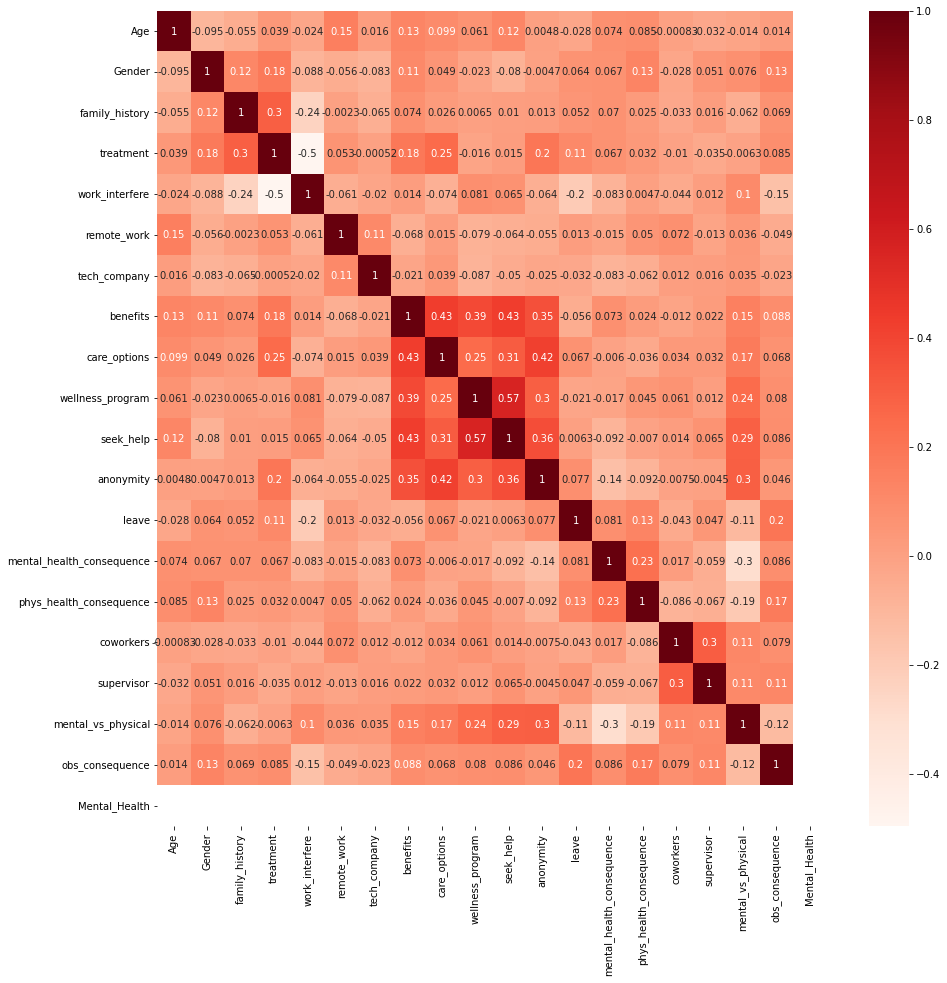

In [9]:
# Create a heatmap displaying the correlation between all the attributes from the dataframe
plt.figure(figsize=(15,15))
sns.heatmap(dfMHealth.corr(), annot=True, cmap='Reds')
plt.show()

From the heatmap above, the darker reds/organge show a higher correlation between two categories while lighter colors show a lower correlation between two categories. Looking at the numbers, the numbers closer to -1 and 1 show higher correlations as well. 

From this heatmap, it appears that the attributes "benefits", "care_options", "wellness_program", "seek_help" all have a relatively high correlation with each other. This correlation may be a result that being aware about one of: the mental health benefits provided by employers, the options for mental health care provided by employers, the mental health wellness program, or the resources to learn more about mental health issues, could correlate with being aware about the others.

Now, we would like to focus on the portion of the dataset on employees that do have a mental health condition, and how different variables in the tech workplace environment that may be influencing their mental health condition.

For the following data analysis below, we'll be using a significance level of 0.10.

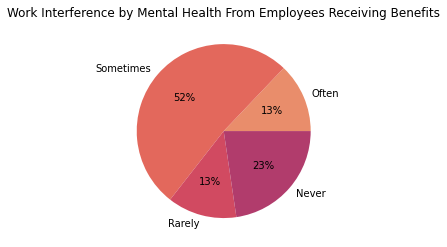

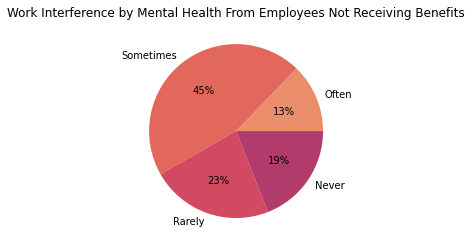

In [10]:
# Find those who are not receiving benefits from employers that have a mental health condition
dfBenefits = dfMHealth[dfMHealth['benefits']== 0]

# Find those who are receiving benefits from employers that have a mental health condition
dfNBenefits = dfMHealth[dfMHealth['benefits']== 1]

# Create a pie chart of those who are receiving benefits from employers, and how they feel 
# their mental health interferes with their work
numBenefits0 = len(dfBenefits[dfBenefits['work_interfere'] == 0])
numBenefits1 = len(dfBenefits[dfBenefits['work_interfere'] == 1])
numBenefits2 = len(dfBenefits[dfBenefits['work_interfere'] == 2])
numBenefits3 = len(dfBenefits[dfBenefits['work_interfere'] == 3])
data = [numBenefits0, numBenefits1, numBenefits2, numBenefits3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees Receiving Benefits')
plt.show()

# Create a pie chart of those who are not receiving benefits from employers, and how they feel 
# their mental health interferes with their work
numNBenefits0 = len(dfNBenefits[dfNBenefits['work_interfere'] == 0])
numNBenefits1 = len(dfNBenefits[dfNBenefits['work_interfere'] == 1])
numNBenefits2 = len(dfNBenefits[dfNBenefits['work_interfere'] == 2])
numNBenefits3 = len(dfNBenefits[dfNBenefits['work_interfere'] == 3])
data = [numNBenefits0, numNBenefits1, numNBenefits2, numNBenefits3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees Not Receiving Benefits')
plt.show()

One question respondents were asked was "Does your employer provide mental health benefits?" and the answer choices were "Yes" and "No". This focus is on those with mental health conditions and the effect of mental health benefits on their work. We decided to split the data into 2 groups, those who had access to mental health benefits (Categorized as "Yes") and those who don't or didn't know (Categorized as "No). 

After forming these 2 groups, we analyzed their work inteference for which the possible answers included "never", "rarely", "sometimes", and "often". By assigning 0,1,2,and 3 to the respective answers, we were able to calculate the average work interference for those who receive benefits and those who don't.

In [11]:
print(stats.ttest_ind(dfBenefits['work_interfere'], dfNBenefits['work_interfere']))

Ttest_indResult(statistic=-0.3169607944450189, pvalue=0.7513949525643654)


The null hypothesis: 𝐻𝑜 = There is no relationship between mental health benefits and work interference on mental health.

The alternate hypothesis: 𝐻𝑎 = There is a relationship between mental health benefits and work interference on mental health.

From the T-test above, we can see that our p-value, 0.7514 > 0.10, which means that we fail to reject the null hypothesis. Having access to mental health benefits does not have a statistically significant impact on improving mental health in the tech industry.

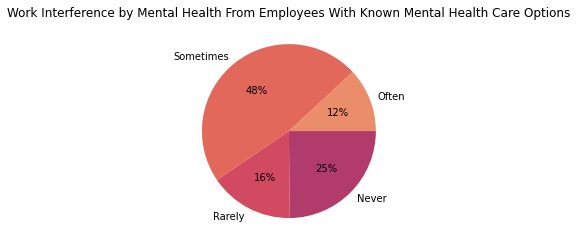

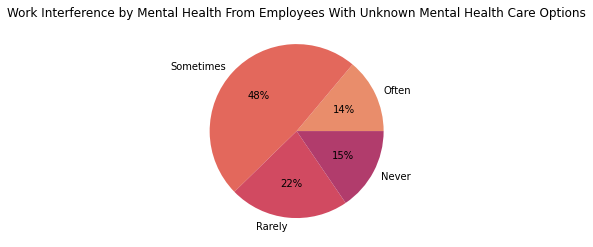

In [12]:
# Find those who are not receiving benefits from employers with mental health condition
dfCare = dfMHealth[dfMHealth['care_options'] == 0]

# Find those who are receiving benefits from employers with mental health condition
dfNCare = dfMHealth[dfMHealth['care_options'] == 1]

# Create a pie chart of those who are receiving mental health care options from employers, 
# and how they feel their mental health interferes with their work
numCare0 = len(dfCare[dfCare['work_interfere'] == 0])
numCare1 = len(dfCare[dfCare['work_interfere'] == 1])
numCare2 = len(dfCare[dfCare['work_interfere'] == 2])
numCare3 = len(dfCare[dfCare['work_interfere'] == 3])
data = [numCare0, numCare1, numCare2, numCare3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With Known Mental Health Care Options')
plt.show()

# Create a pie chart of those who are not receiving mental health care options from employers, 
# and how they feel their mental health interferes with their work
numNCare0 = len(dfNCare[dfNCare['work_interfere'] == 0])
numNCare1 = len(dfNCare[dfNCare['work_interfere'] == 1])
numNCare2 = len(dfNCare[dfNCare['work_interfere'] == 2])
numNCare3 = len(dfNCare[dfNCare['work_interfere'] == 3])
data = [numNCare0, numNCare1, numNCare2, numNCare3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With Unknown Mental Health Care Options')
plt.show()

Another question respondents were asked was "Do you know the options for mental health care your employer provides?" and the answer choices were "Yes" and "No". This focus is on those with mental health conditions and the effect of mental health care on their work. We decided to split the data into 2 groups, those who had access to mental health care (Categorized as "Yes") and those who don't or didn't know (Categorized as "No). 

After forming these 2 groups, we analyzed their work interference for which the possible answers included "never", "rarely", "sometimes", and "often". By assigning 0, 1, 2, and 3 to the respective answers, we were able to calculate the average work interference for those who have mental health care options, and those who don't.

In [13]:
print(stats.ttest_ind(dfCare['work_interfere'], dfNCare['work_interfere']))

Ttest_indResult(statistic=1.7198200503223497, pvalue=0.08603391717192009)


The null hypothesis: 𝐻𝑜 = There is no relationship between having mental health care options and work interference on mental health.

The alternate hypothesis: 𝐻𝑎 = There is a relationship between having mental health care options and work interference on mental health.

From the T-test above, we can see that our p-value, 0.0860 < 0.10, which means that we reject the null hypothesis. Having access to mental health care options does have a statistically significant impact on improving mental health in the tech industry.

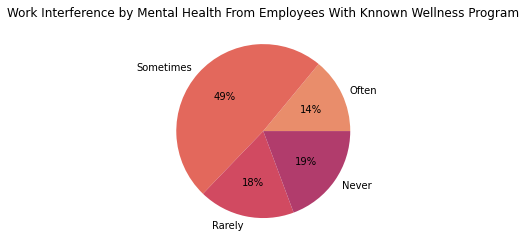

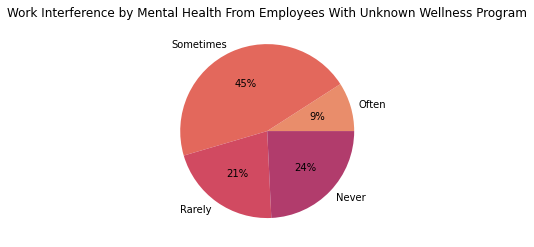

In [14]:
# Find those who are not receiving benefits from employers with mental health condition
dfWellness = dfMHealth[dfMHealth['wellness_program'] == 0]

# Find those who are receiving benefits from employers with mental health condition
dfNWellness = dfMHealth[dfMHealth['wellness_program'] == 1]

# Create a pie chart of those who have access to mental health wellness programs from employers, 
# and how they feel their mental health interferes with their work
numWellness0 = len(dfWellness[dfWellness['work_interfere'] == 0])
numWellness1 = len(dfWellness[dfWellness['work_interfere'] == 1])
numWellness2 = len(dfWellness[dfWellness['work_interfere'] == 2])
numWellness3 = len(dfWellness[dfWellness['work_interfere'] == 3])
data = [numWellness0, numWellness1, numWellness2, numWellness3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With Knnown Wellness Program')
plt.show()

# Create a pie chart of those who do not have access to mental health wellness programs from employers, 
# and how they feel their mental health interferes with their work
numNWellness0 = len(dfNWellness[dfNWellness['work_interfere'] == 0])
numNWellness1 = len(dfNWellness[dfNWellness['work_interfere'] == 1])
numNWellness2 = len(dfNWellness[dfNWellness['work_interfere'] == 2])
numNWellness3 = len(dfNWellness[dfNWellness['work_interfere'] == 3])
data = [numNWellness0, numNWellness1, numNWellness2, numNWellness3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With Unknown Wellness Program')
plt.show()

Another question respondents were asked was "Has your employer ever discussed mental health as part of an employee wellness program?" and the answer choices were "Yes" and "No". This focus is on those with mental health conditions and the effect of mental health wellness programs on their work. We decided to split the data into 2 groups, those who had access to mental health wellness programs (Categorized as "Yes") and those who don't or didn't know (Categorized as "No). 

After forming these 2 groups, we analyzed their work interference for which the possible answers included "never", "rarely", "sometimes", and "often". By assigning 0, 1, 2, and 3 to the respective answers, we were able to calculate the average work interference for those who had access to mental health wellness programs and those who don't.

In [15]:
print(stats.ttest_ind(dfWellness['work_interfere'], dfNWellness['work_interfere']))

Ttest_indResult(statistic=-1.894436439895522, pvalue=0.058697193222362706)


The null hypothesis: 𝐻𝑜 = There is no relationship between having mental health wellness programs and work interference on mental health.

The alternate hypothesis: 𝐻𝑎 = There is a relationship between having mental health wellness programs and work interference on mental health.

From the T-test above, we can see that our p-value, 0.0587 < 0.10, which means that we reject the null hypothesis. Having access to mental health wellness programs does have a statistically significant impact on improving mental health in the tech industry.

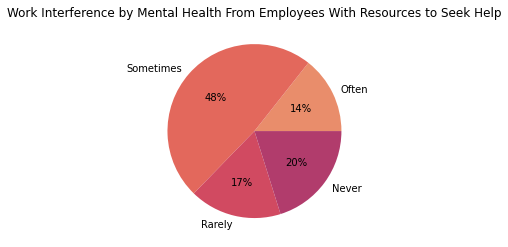

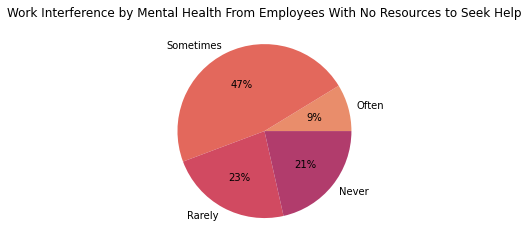

In [16]:
# Find those who are not receiving benefits from employers with mental health condition
dfHelp = dfMHealth[dfMHealth['seek_help'] == 0]

# Find those who are receiving benefits from employers with mental health condition
dfNHelp = dfMHealth[dfMHealth['seek_help'] == 1]

# Create a pie chart of those who have resources to learn more about mental health and seek help, 
# and how they feel their mental health interferes with their work
numHelp0 = len(dfHelp[dfHelp['work_interfere'] == 0])
numHelp1 = len(dfHelp[dfHelp['work_interfere'] == 1])
numHelp2 = len(dfHelp[dfHelp['work_interfere'] == 2])
numHelp3 = len(dfHelp[dfHelp['work_interfere'] == 3])
data = [numHelp0, numHelp1, numHelp2, numHelp3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With Resources to Seek Help')
plt.show()

# Create a pie chart of those who do not have resources to learn more about mental health and seek help, 
# and how they feel their mental health interferes with their work
numNHelp0 = len(dfNHelp[dfNHelp['work_interfere'] == 0])
numNHelp1 = len(dfNHelp[dfNHelp['work_interfere'] == 1])
numNHelp2 = len(dfNHelp[dfNHelp['work_interfere'] == 2])
numNHelp3 = len(dfNHelp[dfNHelp['work_interfere'] == 3])
data = [numNHelp0, numNHelp1, numNHelp2, numNHelp3]
labels = ['Often', 'Sometimes', 'Rarely', 'Never']
colors = sns.color_palette('flare')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Work Interference by Mental Health From Employees With No Resources to Seek Help')
plt.show()

Another question respondents were asked was "Does your employer provide resources to learn more about mental health issues and how to seek help?" and the answer choices were "Yes" and "No". This focus is on those with mental health conditions and the effect of having resources to learn more about mental health and seek help on their work. We decided to split the data into 2 groups, those who had access to these mental health resources (Categorized as "Yes") and those who don't or didn't know (Categorized as "No).

After forming these 2 groups, we analyzed their work interference for which the possible answers included "never", "rarely", "sometimes", and "often". By assigning 0, 1, 2, and 3 to the respective answers, we were able to calculate the average work interference for those who had access to resources to learn more about mental health and seek help and those who don't.

In [17]:
print(stats.ttest_ind(dfHelp['work_interfere'], dfNHelp['work_interfere']))

Ttest_indResult(statistic=-1.520402718856143, pvalue=0.12899078065210312)


The null hypothesis: 𝐻𝑜 = There is no relationship between having resources to learn more about mental health and seek help versus work interference on mental health.

The alternate hypothesis: 𝐻𝑎 = There is a relationship between having resources to learn more about mental health and seek help versus work interference on mental health.

From the T-test above, we can see that our p-value, 0.1290 > 0.10, which means that we fail to reject the null hypothesis. Having access to resources to learn more about mental health and seek help does not have a statistically significant impact on improving mental health in the tech industry.

## Conclusion and Moving Forward

In conclusion, from the t-tests above, employees with mental health condition at companies that offer wellness programs and mental care options experience less interference from their condition during work.

Moving forward, we can do even further analysis with this data. Previously, we only looked at some attributes, however, it's important to look at every attribute that may influence mental health interference at their tech work environments. 

Below, we can see the logistic regression model and confusion matrix for predictors "wellness_program" and "care_option" with response "work_interfere":

In [18]:
# creates a logistic regression model
dfLRegression = dfMHealth[['wellness_program', 'care_options']]

X = dfLRegression
y = dfMHealth['work_interfere']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()

# fits the model with data
reg = logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# Prints a summary of the relationship between "wellness_program" and "care_option" with "work_interfere"
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         work_interfere   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.393
Date:                Sun, 24 Oct 2021   Prob (F-statistic):             0.0128
Time:                        05:18:22   Log-Likelihood:                -746.32
No. Observations:                 546   AIC:                             1499.
Df Residuals:                     543   BIC:                             1512.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.5002      0.057  

Text(0.5, 257.44, 'Predicted Response')

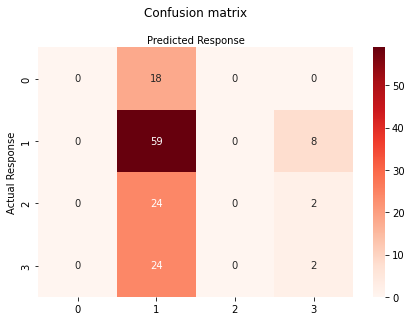

In [19]:
# Creates a confusion matrix to calculate accuracy between the predicted values and actual values
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names =[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Shows the confusion matrix as a heapmap for better visualization
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Reds', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Response')
plt.xlabel('Predicted Response')

In [20]:
# Prints the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.44525547445255476


Looking above, the logistic regression equation on "wellness_program" and "care_option" with response "work_interfere" creates a model that may not be optimal for predicting how much mental health interferes with one's work. This is because our confusion matrix results in a very low accuracy. This low accuracy and non-optimal model could be due to not including other attributes that may affect how much mental health interferes with one's work. 

Moving forward, we would definitely take a closer look at more attributes and possibly more datasets that could make our logistic model better, with increased accuracy in predictions of how much mental health interferes with one's work depending on the tech work environment.